In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('../input/data-set-regrssion/aug_train.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [6]:
df['gender'] = df['gender'].fillna('Unknown')

In [7]:
df['enrolled_university'] = df['enrolled_university'].fillna(df['enrolled_university'].mode()[0])

In [10]:
df['education_level'] = df['education_level'].fillna(df['education_level'].mode()[0])

In [11]:
df['major_discipline'] = df['major_discipline'].fillna('Not Specified')

In [14]:
df['experience'] = df['experience'].replace({'<1': '0', '>20': '21'}).astype(float)
df['experience'] = df['experience'].fillna(df['experience'].median())

In [ ]:
df['company_size'] = df['company_size'].fillna('Unknown')

In [ ]:
df['company_type'] = df['company_type'].fillna('Unknown')

In [15]:
df['last_new_job'] = df['last_new_job'].fillna(df['last_new_job'].mode()[0])

In [16]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                   0
company_size              5938
company_type              6140
last_new_job                 0
training_hours               0
target                       0
dtype: int64

In [17]:
df.head()

enrollee_id      city  city_development_index   gender  \
0         8949  city_103                   0.920     Male   
1        29725   city_40                   0.776     Male   
2        11561   city_21                   0.624  Unknown   
3        33241  city_115                   0.789  Unknown   
4          666  city_162                   0.767     Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience       no_enrollment        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline  experience company_size    company_type last_new_job  \
0             STEM        21.0          NaN             NaN            1   
1             STEM        15.0        50-99         Pvt Ltd           >4   
2             STEM         5.0          NaN             NaN        never   
3  Business Degree         0.0          NaN         Pvt Ltd        never   
4             STEM        21.0        50-99  Funded Startup            4   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
3              52     1.0  
4               8     0.0

In [22]:
df['experience'] = df['experience'].astype(float) 

In [24]:
label_encoder = LabelEncoder()
df['education_level'] = label_encoder.fit_transform(df['education_level'])

In [25]:
columns_to_encode = [col for col in ['gender', 'company_type', 'enrolled_university'] if col in df.columns]

df = pd.get_dummies(df, columns=columns_to_encode)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


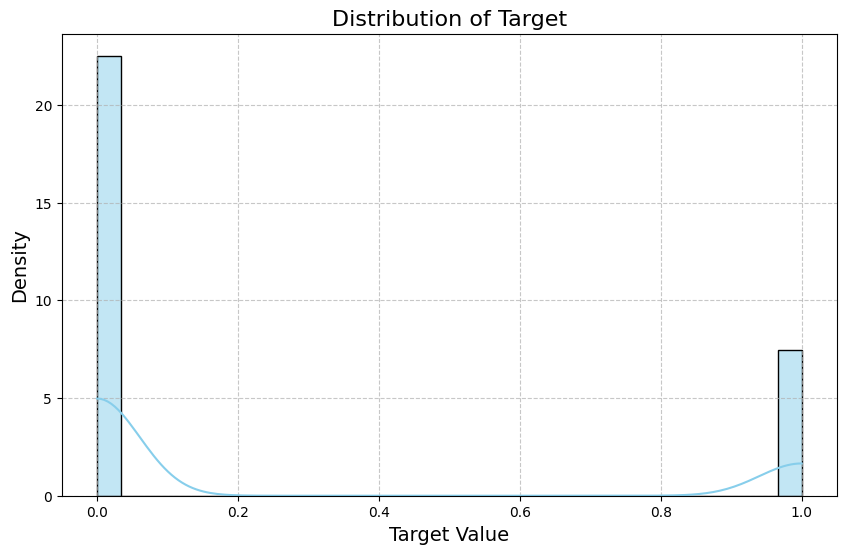

In [29]:

plt.figure(figsize=(10, 6))

sns.histplot(df['target'], kde=True, bins=30, color='skyblue' , stat='density')

plt.title("Distribution of Target", fontsize=16)
plt.xlabel("Target Value", fontsize=14)
plt.ylabel("Density", fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


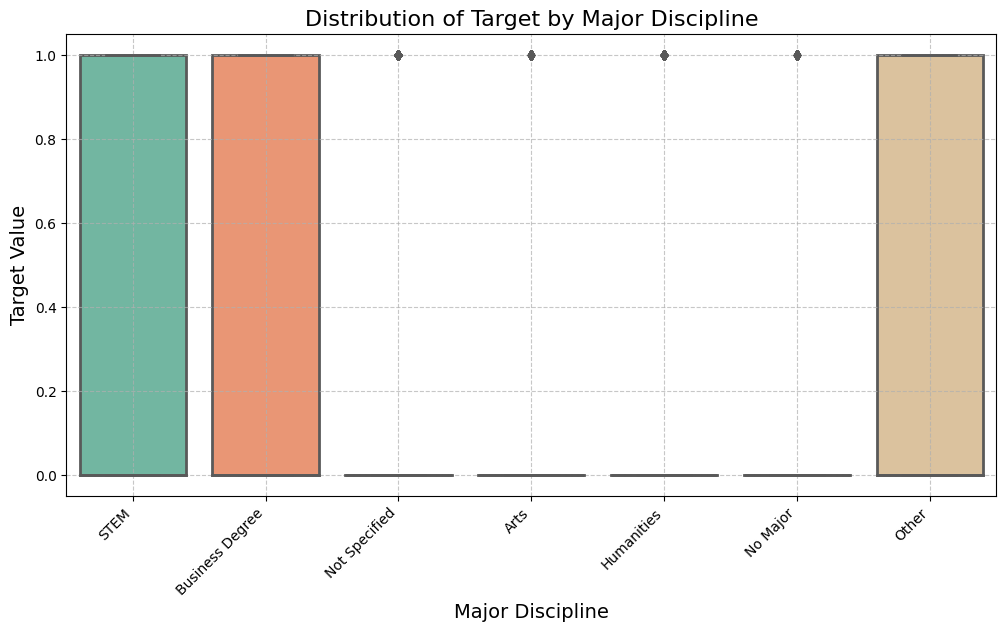

In [30]:

plt.figure(figsize=(12, 6))

sns.boxplot(data=df, x='major_discipline', y='target', palette='Set2', linewidth=2)
plt.title("Distribution of Target by Major Discipline", fontsize=16)
plt.xlabel("Major Discipline", fontsize=14)
plt.ylabel("Target Value", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


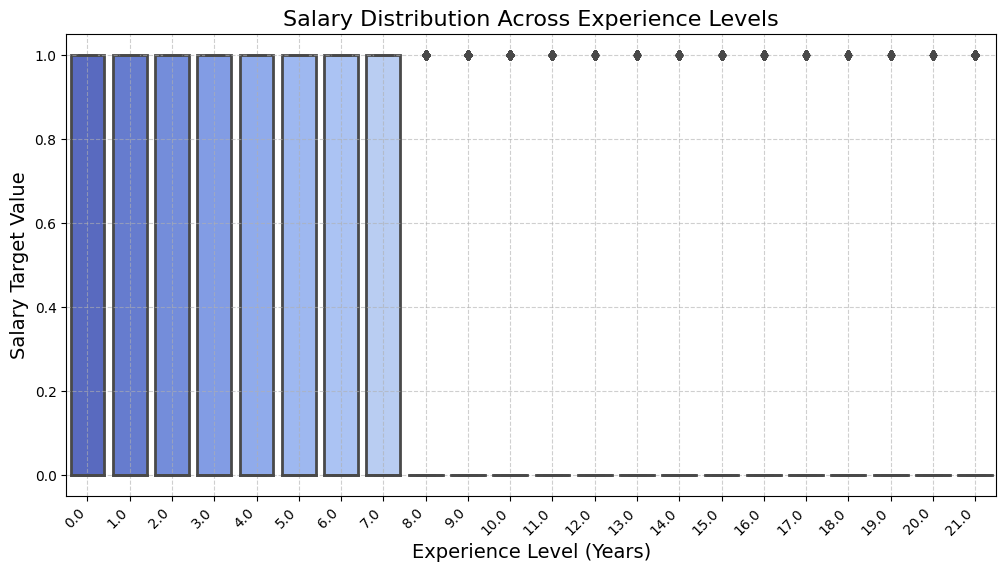

In [31]:

plt.figure(figsize=(12, 6))


sns.boxplot(data=df, x='experience', y='target', palette='coolwarm', linewidth=2)


plt.title("Salary Distribution Across Experience Levels", fontsize=16)
plt.xlabel("Experience Level (Years)", fontsize=14)
plt.ylabel("Salary Target Value", fontsize=14)


plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


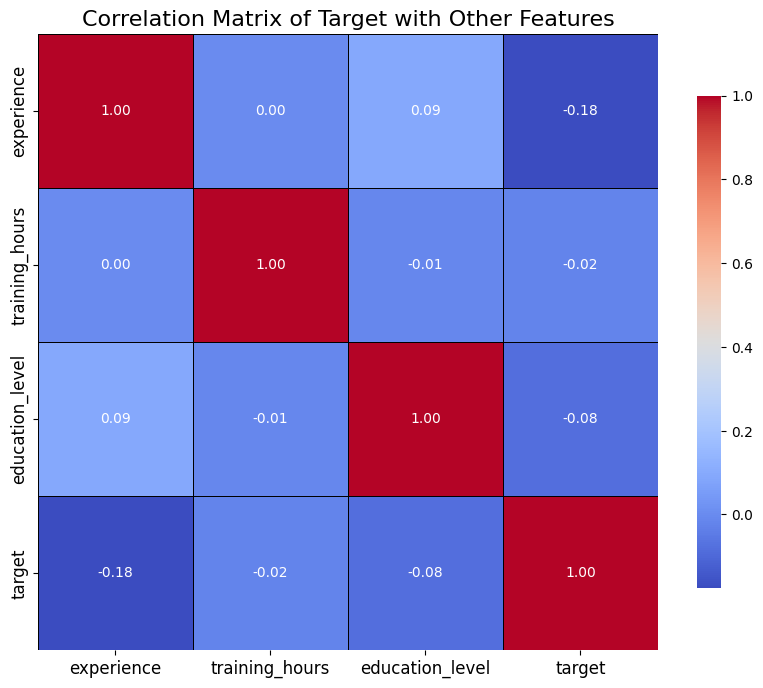

In [32]:

correlation_matrix = df[['experience', 'training_hours', 'education_level', 'target']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black', cbar_kws={'shrink': 0.8})
plt.title("Correlation Matrix of Target with Other Features", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


In [34]:
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [35]:
X = df_encoded.drop(columns=['target', 'enrollee_id'])  
y = df_encoded['target']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = lr_model.predict(X_test)

In [39]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [40]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 0.29889687990962005
Mean Squared Error (MSE): 0.1490414454985111
R² Score: 0.20176894732437256


In [41]:
coefficients = lr_model.coef_

In [42]:
feature_importance = list(zip(X.columns, coefficients))
feature_importance.sort(key=lambda x: abs(x[1]), reverse=True)

In [43]:
print("\nTop 10 most important features:")
for feature, coef in feature_importance[:10]:
    print(f"\n{feature}: {coef}")


Top 10 most important features:

city_development_index: -0.9751819533825202

city_city_171: 0.7687308307791696

city_city_155: 0.4244480750399613

city_city_167: 0.37085809560634064

city_city_25: 0.36116341046581896

city_city_42: 0.33820234445148895

city_city_18: 0.3324311911916514

city_city_121: 0.32600311145739647

city_city_21: 0.3213387333797737

city_city_8: -0.3132317378679526
